## Nonlinear Regression using a Neural Network with Keras

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

Load data from file

In [2]:
data=np.load('data_nonlinear_regression.npy', allow_pickle=True)
data=data.item()
data.keys()

dict_keys(['X_train', 'Y_train', 'X_val', 'Y_val', 'X_test', 'Y_test'])

In [3]:
type(data)

dict

In [4]:
X_train=data['X_train']
Y_train=data['Y_train']
X_val=data['X_val']
Y_val=data['Y_val']
X_test=data['X_test']
Y_test=data['Y_test']

In [5]:
X_train.shape

(800, 3)

In [6]:
X_train.dtype

dtype('float64')

Usually, float32 is enough, so we convert data from float64 into float32

In [7]:
X_train=X_train.astype('float32')
Y_train=Y_train.astype('float32')
X_val=X_val.astype('float32')
Y_val=Y_val.astype('float32')
X_test=X_test.astype('float32')
Y_test=Y_test.astype('float32')

Text(0.5, 0, 'Y')

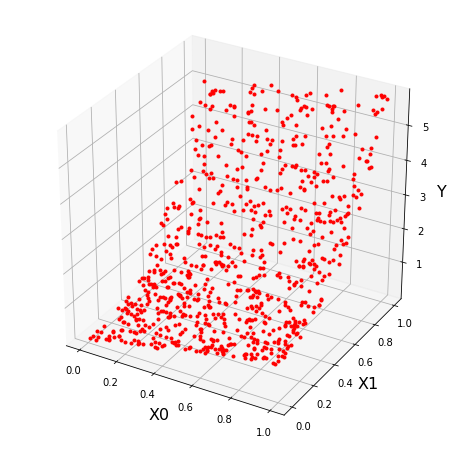

In [8]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot(X_train[:,0], X_train[:,1], Y_train.squeeze(), 'r.')
ax.set_xlabel('X0', fontsize=16)
ax.set_ylabel('X1', fontsize=16)
ax.set_zlabel('Y', fontsize=16)

define the model

In [9]:
model = Sequential()
model.add(Dense(units=16, activation='softplus', input_shape=(3,)))
model.add(Dense(units=16, activation='softplus'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='mse', optimizer=SGD(lr=0.01, momentum=0.9))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [10]:
loss_train_list=[]
loss_val_list=[]

In [11]:
for epoch in range(0, 100):
    #set epochs=1
    print('epoch', epoch)
    history=model.fit(X_train, Y_train, batch_size=64, epochs=1, validation_data=(X_val, Y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])

epoch 0
13/13 [==============================] - 1s 31ms/step - loss: 2.5111 - val_loss: 2.0759
epoch 1
13/13 [==============================] - 0s 7ms/step - loss: 2.1859 - val_loss: 1.8447
epoch 2
13/13 [==============================] - 0s 6ms/step - loss: 1.8355 - val_loss: 1.4040
epoch 3
13/13 [==============================] - 0s 7ms/step - loss: 1.2156 - val_loss: 0.6177
epoch 4
13/13 [==============================] - 0s 7ms/step - loss: 0.4212 - val_loss: 0.1964
epoch 5
13/13 [==============================] - 0s 6ms/step - loss: 0.2854 - val_loss: 0.2733
epoch 6
13/13 [==============================] - 0s 7ms/step - loss: 0.2117 - val_loss: 0.2219
epoch 7
13/13 [==============================] - 0s 6ms/step - loss: 0.2037 - val_loss: 0.1980
epoch 8
13/13 [==============================] - 0s 7ms/step - loss: 0.2075 - val_loss: 0.1991
epoch 9
13/13 [==============================] - 0s 7ms/step - loss: 0.1956 - val_loss: 0.1888
epoch 10
13/13 [==============================] -

plot history

In [12]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

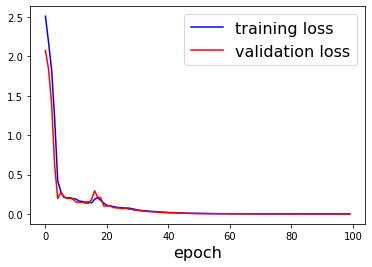

In [13]:
fig, ax = plt.subplots()
ax.plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax.plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax.set_xlabel('epoch',fontsize=16)
ax.legend(fontsize=16)

Usually, we need to tune the hyperparameters of a neural network, <br>
such as the number of layers, the number of units in each layer <br>
For this simple example, we can skip this step

after training, we evaluate the model on the testing dataset

In [14]:
score = model.evaluate(X_test, Y_test, batch_size=64, verbose=0)
print('Test loss:', score)

Test loss: 0.0010446369415149093


Get the predicted target values on the testing set

In [15]:
Yp_test=model.predict(X_test, batch_size=64)

In [16]:
Yp_test.shape

(1000, 1)

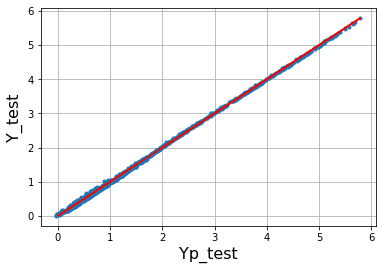

In [17]:
fig, ax = plt.subplots()
ax.plot(Yp_test, Y_test, '.')
ax.plot(Y_test, Y_test, 'r-')
ax.set_xlabel('Yp_test', fontsize=16)
ax.set_ylabel('Y_test', fontsize=16)
ax.grid(True)